# The influence of ICT on PISA test performance
## by Phillip Schneider

## Investigation Overview

> The overall goal of this data analysis project is to investigate the impact of information and communication technology (ICT) on students' PISA test scores. To this end, different aspects like ICT availability, age of first use, current frequency of usage, user behavior and their corresponding effects on academic performance are explored in depth.

## Dataset Overview

> The dataset originates from the Programme for International Student Assessment (PISA), which is a worldwide large-scale study by the Organization for Economic Co-operation and Development (OECD). The results are from the year 2012. During the data preparation, relevant variables from the ICT questionnaire of the PISA study were selected. In total, the dataset consists of 299843 student records and 22 variables.

In [1]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

# Suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Load the preprocessed PISA dataset into a pandas dataframe
pisa_df = pd.read_csv("pisa_new.csv", encoding="utf-8")

## 1) Availability and use of computers at school ▼

> The first visualization gives an overview over the general availability of computers at school. On the left bar chart below, the answers of nearly 300000 students regarding access to school computers are displayed. Next to that, the box plot graph shows the relationship between computer availability and PISA test scores for OECD and non-OECD countries.

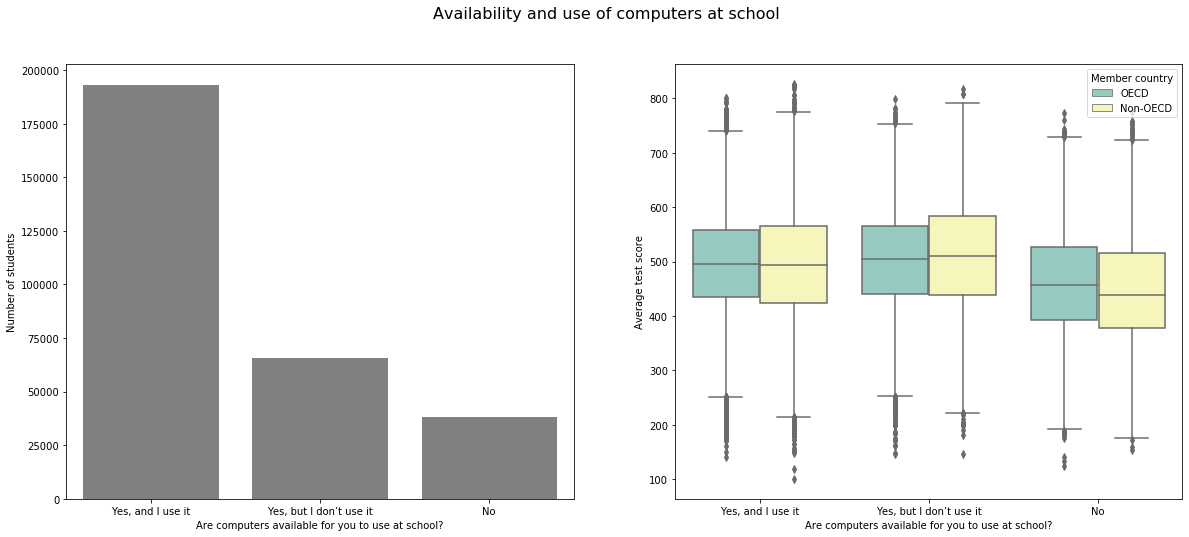

In [3]:
fig, ax = plt.subplots(1,2, figsize = [20,8])
fig.suptitle("Availability and use of computers at school", fontsize=16)

# Create bar chart
sb.countplot(data = pisa_df, x = "at_school_computer", ax = ax[0], 
             order = pisa_df["at_school_computer"].value_counts().index, color="grey")
ax[0].set_ylabel("Number of students")
ax[0].set_xlabel("Are computers available for you to use at school?")

# Create boxplot
sb.boxplot(data = pisa_df, x = "at_school_computer", y = "avg_total_score", hue = "oecd", 
           palette="Set3", ax = ax[1], order = pisa_df.at_school_computer.value_counts().index)
ax[1].set_ylabel("Average test score")
ax[1].set_xlabel("Are computers available for you to use at school?")
plt.legend(title="Member country", loc="upper right")
plt.show();

## Availability and use of computers at school

> From the two charts, it can be seen that the vast majority of students are provided with computer equipment in their schools. When looking at PISA test scores, students in schools without computer access perform worse than those with available computer resources, regardless of actual usage. This observation is noticeable for both OECD and non-OECD countries.

## 2) Average test score in relation to age of first ICT use ▼

> A second investigation focused on whether there is a connection between the age of first ICT use, such as computer or internet technology, and PISA test performance. The results are depicted in the line chart below.

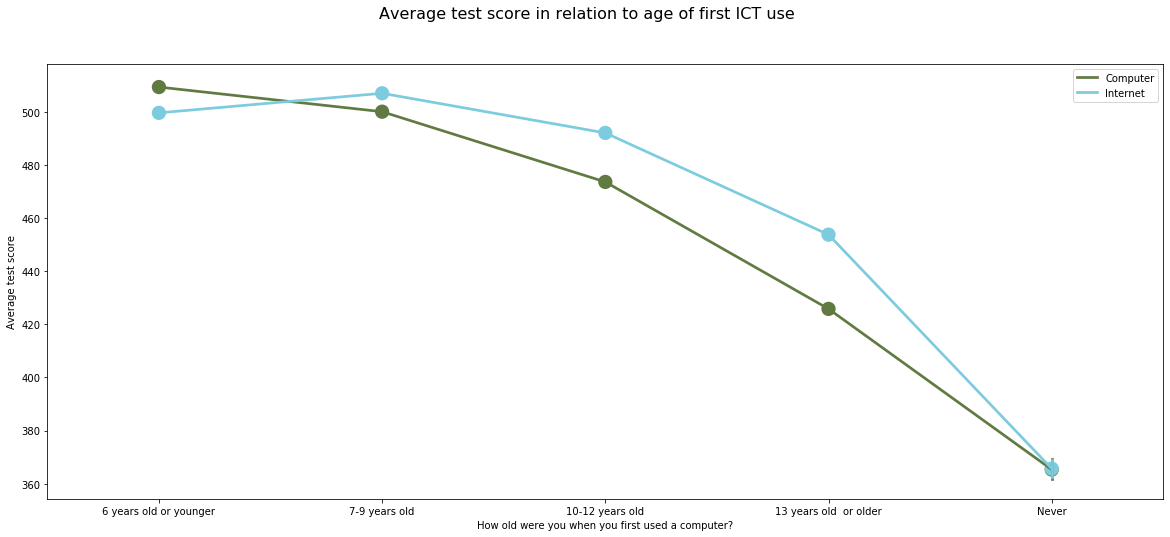

In [4]:
plt.figure(figsize=[20, 8])
plt.suptitle("Average test score in relation to age of first ICT use", fontsize=16)

# Create line plot for two variables
for v in [("first_use_computer", "#617a42"), ("first_use_internet", "#7dcbdf")]:
    sb.pointplot(data = pisa_df, x = v[0], y = "avg_total_score",
                 color = v[1], order = ["6 years old or younger", "7-9 years old", "10-12 years old", 
                                         "13 years old  or older", "Never"])

# Set legend manually
plt.legend(labels=["Computer", "Internet"])
ax = plt.gca()
ax.get_legend().legendHandles[0].set_color("#617a42")
ax.get_legend().legendHandles[1].set_color("#7dcbdf")
ax.set_ylabel("Average test score")
ax.set_xlabel("How old were you when you first used a computer?")
plt.setp(ax.collections, sizes=[150])
plt.show();

## Average test score in relation to age of first ICT use 

>The line chart reveals that students who started using ICT at a relative young age do better in the PISA test. Test scores significantly decline if the first exposure to ICT happened at the age of 10 or older. This trend holds true for both computer and internet technology. Examinees who never used those technologies have by far the lowest average scores.  

## 3) Correlation between study time on the computer and average test scores ▼

>In order to explore how time spent studying on the computer is connected to PISA test performance, a correlation matrix is presented below. In addition, a scatter plot with a linear regression line is provided. 

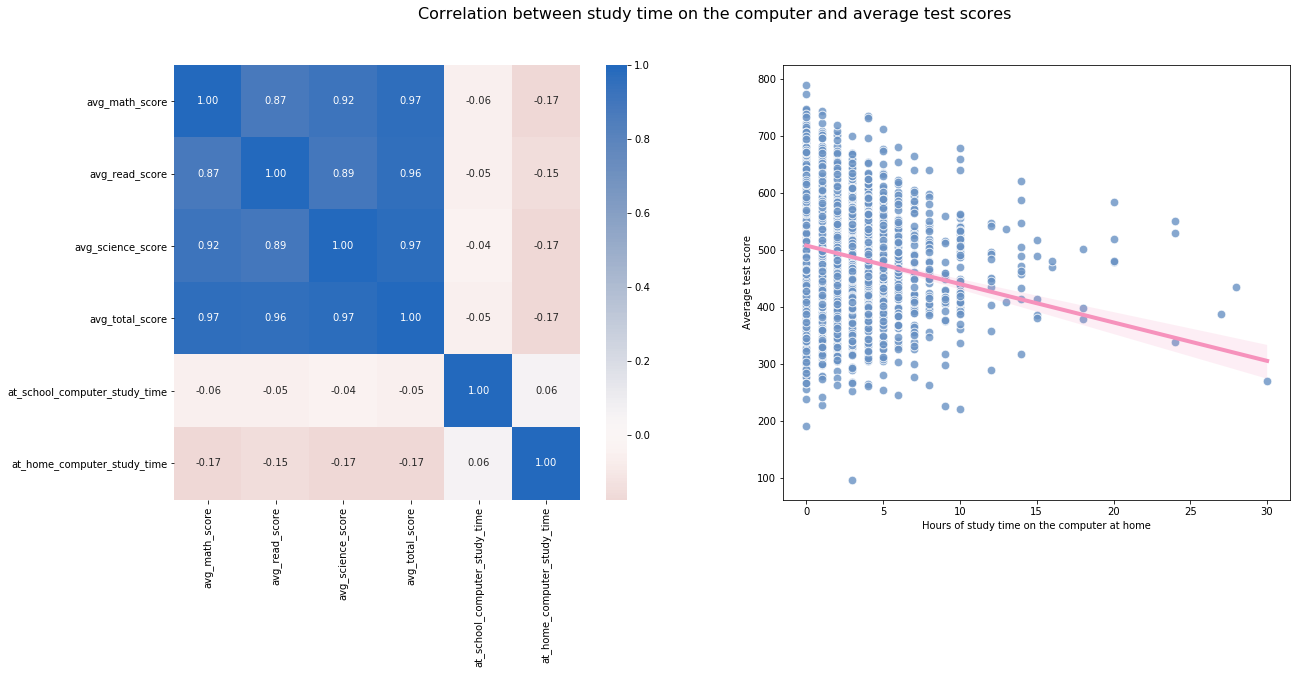

In [5]:
# Sample random subset of 10000 records from pisa data
pisa_df_sample = pisa_df.sample(10000, random_state=42)
numeric_vars = ["avg_math_score", "avg_read_score", "avg_science_score", "avg_total_score", "at_school_computer_study_time", "at_home_computer_study_time"]

fig, ax = plt.subplots(1,2, figsize = [20,8])
fig.suptitle("Correlation between study time on the computer and average test scores", fontsize=16)

# Create correlation matrix with heatmap
sb.heatmap(pisa_df_sample[numeric_vars].corr(), annot = True, fmt = ".2f", cmap = "vlag_r", center = 0, ax = ax[0])

# Create scatter plot with linear regression line
sb.regplot(x="at_home_computer_study_time", y="avg_total_score", data=pisa_df_sample, x_jitter=0, ax = ax[1],
          line_kws={"color": "#F692BC", "lw":4}, scatter_kws={"linewidths":1,"edgecolor":"w", "s":75, "color": "#6891C3"})
ax[1].set_ylabel("Average test score")
ax[1].set_xlabel("Hours of study time on the computer at home")
plt.show();


## Correlation between study time on the computer and average test scores

> The calculated correlations among the variables indicate a very strong, positive statistical relationship between the test scores in the three distinct test areas math, reading and science. This is plausible, since the PISA test aims at assessing general intelligence and cognitive abilities rather than subject matter knowledge alone. In stark contrast, the study time on the computer out of school appears to have a weak, negativ interrelation with test scores, whereby this effect subsides for computer study time at school. The scatter plot on the right also proves that more hours spent studying on the home computer go together with lower average test scores.

## 4) Average test score in relation to frequency of ICT use at school ▼

>Finally, the last visualization is dedicated to usage behavior of ICT at school and its impact on students' scores. The line chart below provides this information for the activities of browsing, emailing, chatting, and posting.

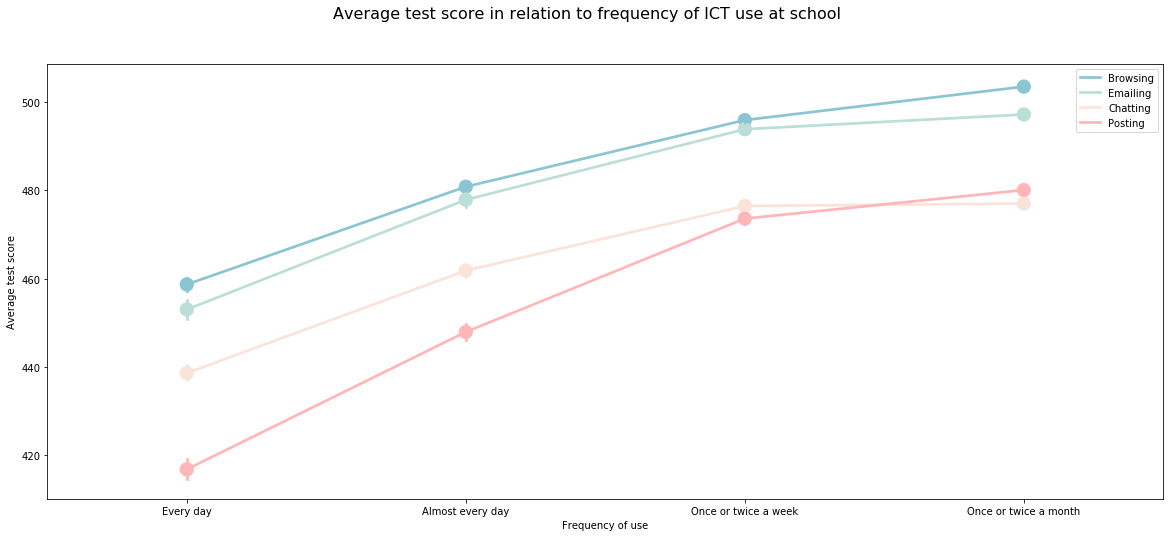

In [6]:
plt.figure(figsize=[20, 8])
plt.suptitle("Average test score in relation to frequency of ICT use at school", fontsize=16)
variable_colors = [("at_school_browsing", "#8ac6d1"), ("at_school_emailing", "#bbded6"), ("at_school_chatting", "#fae3d9"), ("at_school_posting", "#ffb6b9")]
# Create line plot with four variables
for v in variable_colors: 
    ax = sb.pointplot(data = pisa_df, x = v[0], y = "avg_total_score", order = ["Every day", "Almost every day", "Once or twice a week",
           "Once or twice a month"], color = v[1], linestyles = "-")

# Set legend manually
plt.legend(labels=["Browsing", "Emailing", "Chatting", "Posting"])
ax = plt.gca()
for v in variable_colors:
    ax.get_legend().legendHandles[variable_colors.index(v)].set_color(v[1])
ax.set(xlabel = "Frequency of use", ylabel= "Average test score")
plt.setp(ax.collections, sizes=[150])
plt.show();

## Average test score in relation to frequency of ICT use at school

>By analyzing the four lines, a certain trend becomes recognizable. The higher the frequency of ICT use at school, the lower are the achieved PISA test scores. Students who reported daily ICT usage perform the worst. However, the described effect of less ICT usage and higher test scores is not linear, but wears off after a lower than weekly use frequency. It is also important to point out that specific activities like chatting or posting, often connected with social media, tend to affect test scores more negatively than activities like browsing or emailing. This can be observed across all levels of use frequency. 

> > `jupyter nbconvert slide_deck_pisa_data.ipynb --to slides --post serve --template output_toggle`

## Conclusion

>The insights of this PISA data analysis project ultimately culminate in two important findings. On the one hand, the availability of ICT at schools seems to contribute to a solid education, since, according to the data, students in schools equipped with such technology perform better. Maybe it is a general indication of investment in learning resources. Furthermore, the exposure to ICT at a young age, which may also happen in schools, is usually related to higher test scores. On the other hand, somewhat contradictory to the former, the data revealed not a positive but a negative correlation between study time spent on computers and PISA test performance. A possible explanation could be that students have not learned yet how to properly use ICT for studying. Inefficient studying along with the existence of many distractions on the internet may be a main cause. As the analysis of usage behavior showed, students using ICT for chatting, posting, browsing, or emailing at school on a daily basis perform significantly worse on the test. Constant distractions through ICT devices might seriously impede their education. Hence, it is recommended that schools teach students how to responsibly deal with ICT and what effective study strategies are.